In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from meteostat import Point, Daily
import seaborn as sns
import numpy as np

In [3]:
#utility functions
def collect_weekly_weather_data():
    start = datetime(2022, 1, 1)
    end = datetime(2022, 12, 31)
    
    # Create Point for location of business, BC
    frst_hll = Point(32.6721 , -97.2692, 70)
    
    # Create Point for Vancouver, BC
    data = Daily(frst_hll, start, end)
    data = data.fetch()
    date_range = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
    data['date'] = date_range

    
    week = data.groupby(pd.Grouper(key="date", freq="7D",origin='2022-01-01')).agg({'tavg':'mean'})
    week_reset = week.reset_index()
    # Plot line chart including average, minimum and maximum temperature
    #data.plot(y=['tavg', 'tmin', 'tmax'])
    #plt.show()
    return week_reset

In [4]:
print(collect_weekly_weather_data().keys)

<bound method NDFrame.keys of          date       tavg
0  2022-01-01   6.000000
1  2022-01-08  10.485714
2  2022-01-15   6.842857
3  2022-01-22   7.142857
4  2022-01-29   8.142857
5  2022-02-05   9.214286
6  2022-02-12  10.800000
7  2022-02-19   7.385714
8  2022-02-26  12.642857
9  2022-03-05  10.785714
10 2022-03-12  15.516667
11 2022-03-19  15.057143
12 2022-03-26  19.614286
13 2022-04-02  19.914286
14 2022-04-09  22.142857
15 2022-04-16  22.385714
16 2022-04-23  21.571429
17 2022-04-30  23.128571
18 2022-05-07  28.785714
19 2022-05-14  29.542857
20 2022-05-21  22.871429
21 2022-05-28  28.385714
22 2022-06-04  29.557143
23 2022-06-11  32.828571
24 2022-06-18  32.742857
25 2022-06-25  30.900000
26 2022-07-02  33.271429
27 2022-07-09  33.342857
28 2022-07-16  34.671429
29 2022-07-23  34.014286
30 2022-07-30  34.085714
31 2022-08-06  31.728571
32 2022-08-13  31.257143
33 2022-08-20  27.485714
34 2022-08-27  28.100000
35 2022-09-03  27.342857
36 2022-09-10  25.257143
37 2022-09-17  29.04

In [5]:
#collect weekly gas avg price
def collect_weekly_gas_avg():
    week_gas_df = pd.read_csv('data/csv/original/gas_avg_weekly_2022.csv')
    print(week_gas_df)
    return week_gas_df


In [6]:

def createRangeList(start, end):
    return np.arange(start, end+1, 1)

def getEmptyCells(data_frame,column_name):
    nans = pd.isna(data_frame[column_name])
    nan_indices = []
    index_counter = 0
    for nan in nans:
        if nan == True:
            nan_indices.append(index_counter)
        index_counter = index_counter + 1
    return nan_indices

def weekly_sales_chart(scan_code,mean,week_frame,item_dict):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    description = week_frame.loc[week_frame['Scan Code'] == scan_code]['Description'].unique()[0]
    week =  [tuple[0] for tuple in item_dict[scan_code]]
    qty = np.array([tuple[1] for tuple in item_dict[scan_code]])
    total_sold = qty.sum()
    ax.set_title("Weekly Sales Chart: " + description)
    ax.bar(week,qty)
    plt.show()
    
def weekly_sales_mean_chart(item_mean_list):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    #description = week_frame.loc[week_frame['Scan Code'] == scan_code]['Description'].unique()[0]
    item =  [tuple[0] for tuple in item_mean_list]
    mean = np.array([tuple[1] for tuple in item_mean_list])
    ax.set_title("Weekly Mean of Sold Quantity of Every Item")
    plt.xlabel('Week')
    plt.ylabel('Weekly Sales Mean')
    #total_sold = qty.sum()
    #ax.set_title("Scan Code: " + str(scan_code)+ "  Description: " + description + "Sold : "+ str(total_sold))
    ax.bar(item,mean)
    plt.show()
def price_qty_chart(scan_code,week_frame,item_dict):
    
    description = week_frame.loc[week_frame['Scan Code'] == scan_code]['Description'].unique()[0]
    price =  [tuple[2] for tuple in item_dict[scan_code]]
    qty = np.array([tuple[1] for tuple in item_dict[scan_code]])
    plt.scatter(price, qty, label= "stars", color= "m",  
            marker= "*", s=30) 
    plt.xlabel('Price')
    plt.ylabel('Quantity Sold Per Week') 
    
    plt.legend() 
    plt.show()
def compare_weekly_sales(scan_code1,scan_code2,week_frame,item_dict):
#     data = [[30, 25, 50, 20],
#     [40, 23, 51, 17],
#     [35, 22, 45, 19]]
    prod_1 = list(int(tuple[1]) for tuple in item_dict[scan_code1])
    reduced_prod_1 = prod_1[:15]
    prod_2 = list(int(tuple[1]) for tuple in item_dict[scan_code2])
    reduced_prod_2 = prod_2[:15]
    width = 0.25
    r = np.arange(52)
    plt.bar(r, reduced_prod_1, color = 'b',
        width = width, edgecolor = 'black',
        label='Item1')
    plt.bar(r + width, reduced_prod_2, color = 'g',
        width = width, edgecolor = 'black',
        label='Item2')
    plt.xlabel("Week")
    plt.ylabel("Total Sales Per Week")
    plt.title("VS")
    plt.xticks(r + width/2,['1','2','3','4'])
    plt.legend()
    plt.show()


In [36]:
#the file contains transactional record starting 01/01/2022 to 29/12/2022
df = pd.read_csv('data/csv/original/sales2022.csv',dtype={'Scan Code':str})

#remove all unidentified items except for gas and lotto online
nan_scan_code = getEmptyCells(df,'Scan Code')
for i in nan_scan_code:
    #print(df['Description'][i])
    if df['Department'][i] == 'GAS PUMP #1' or df['Department'][i] == 'GAS PUMP #2' or df['Department'][i] == 'GAS PUMP #3' or df['Department'][i] == 'GAS PUMP #4':
        df.loc[df.index[i], 'Scan Code'] = '2235'
        df.loc[df.index[i], 'Department'] = 'GAS'
    elif df['Department'][i] == 'LOTTO ONLINE':
        df.loc[df.index[i], 'Scan Code'] = '2236'

print("Before removing nan scan codes : ",df.shape)
nan_scan_code = getEmptyCells(df,'Scan Code')

#drop NaN values
df.drop(index=nan_scan_code,axis=0,inplace=True)
print("After removing NaN scan codes : ",df.shape)
df.drop(columns=['Register','Unnamed: 14'],inplace=True)
df.to_csv('data/csv/computed/demand_forecaste.csv',index=False,index_label=False)


Before removing nan scan codes :  (480070, 15)
After removing NaN scan codes :  (452372, 15)


In [37]:
df = pd.read_csv('data/csv/computed/demand_forecaste.csv',low_memory=False)
#remove items with POS Cost 0, except for Gas and Lotto Online, this is an outlier. Cost for an item is never zero
zero_cost = df[df['POS Cost'] == 0].index
for i in zero_cost:
    if df['Department'][i] == 'GAS PUMP #1' or df['Department'][i] == 'GAS PUMP #2' or df['Department'][i] == 'GAS PUMP #3' or df['Department'][i] == 'GAS PUMP #4':
        df.loc[df.index[i], 'POS Cost'] = df['POS Retail'][i] -  (0.2 * df['POS Retail'][i]) # mean profit is 20%. Consulted with owner. Mean used because actual gas price were not recorded by the owner
    elif df['Department'][i] == 'LOTTO ONLINE' or df['Department'][i] == 'LOTTO SCRATCH OFF':
        df.loc[df.index[i], 'POS Cost'] = df['POS Retail'][i] -  (0.05 * df['POS Retail'][i]) 
        
zero_cost = df[df['POS Cost'] == 0].index
df.drop(index=zero_cost,axis=0,inplace=True)
print("After removing numm zero costs : ",df.shape)
df.reset_index(inplace=True)
df


After removing numm zero costs :  (411442, 13)


,index,Date,Scan Code,Description,Department,Qty,POS Cost,POS Retail,Retail at Sale,Selling Units,Margin,Profit,Promo ID,Tran ID
0,0,01/01/2022 8:53:42 AM,049000050103,Coca Cola 2 Liters,SODA,2.0,1.89,2.93,2.93,1.0,35.49,2.09,0,197343
1,1,01/01/2022 8:53:42 AM,817522023710,Lucky 7s,LOTTO SCRATCH OFF,1.0,4.75,5.00,5.00,1.0,5.00,0.00,0,197343
2,2,01/01/2022 8:57:20 AM,078000035872,20oz fruit crush,SODA,1.0,1.17,2.19,2.19,1.0,46.58,1.02,0,197344
3,3,01/01/2022 8:57:20 AM,071610496088,honey fusion dutch,Cigar,1.0,0.58,0.99,0.99,1.0,41.41,0.41,0,197344
4,4,01/01/2022 8:57:20 AM,028400325059,doritos nacho cheese,SNACKS,1.0,1.39,1.99,1.99,1.0,30.15,0.60,0,197344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411437,452367,12/31/2022 11:08:29 PM,611269818994,Red Bull Energy 12oz,SODA,1.0,2.05,3.49,3.49,1.0,41.26,1.44,0,393452
411438,452368,12/31/2022 11:08:29 PM,857244005045,Asylum schizo 7*70,IMP CIGAR,1.0,3.23,7.49,7.49,1.0,56.88,4.26,0,393452
411439,452369,12/31/2022 11:09:27 PM,080660957760,MODELO ESPECIAL 24/12OZ,BEER,1.0,28.50,34.99,34.99,1.0,18.55,6.49,0,393453
411440,452370,12/31/2022 11:09:27 PM,012300197410,CAMEL CRUSH BOX,Cigarettes,1.0,7.88,8.99,8.99,1.0,12.35,1.11,0,393453


In [ ]:
#daily entries


In [38]:
#find promotions and discounts
#finding discounted items and thier respective dates
zero_retail = getEmptyCells(df,'Retail at Sale')
df['Discounts'] = ''
for i in zero_retail:
    df['Retail at Sale'][i] = df['POS Retail'][i]
df['Discounts'] = df['Retail at Sale'] - df['POS Retail']
df

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index,Date,Scan Code,Description,Department,Qty,POS Cost,POS Retail,Retail at Sale,Selling Units,Margin,Profit,Promo ID,Tran ID,Discounts
0,0,01/01/2022 8:53:42 AM,049000050103,Coca Cola 2 Liters,SODA,2.0,1.89,2.93,2.93,1.0,35.49,2.09,0,197343,0.00
1,1,01/01/2022 8:53:42 AM,817522023710,Lucky 7s,LOTTO SCRATCH OFF,1.0,4.75,5.00,5.00,1.0,5.00,0.00,0,197343,0.00
2,2,01/01/2022 8:57:20 AM,078000035872,20oz fruit crush,SODA,1.0,1.17,2.19,2.19,1.0,46.58,1.02,0,197344,0.00
3,3,01/01/2022 8:57:20 AM,071610496088,honey fusion dutch,Cigar,1.0,0.58,0.99,0.99,1.0,41.41,0.41,0,197344,0.00
4,4,01/01/2022 8:57:20 AM,028400325059,doritos nacho cheese,SNACKS,1.0,1.39,1.99,1.99,1.0,30.15,0.60,0,197344,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411437,452367,12/31/2022 11:08:29 PM,611269818994,Red Bull Energy 12oz,SODA,1.0,2.05,3.49,3.49,1.0,41.26,1.44,0,393452,0.00
411438,452368,12/31/2022 11:08:29 PM,857244005045,Asylum schizo 7*70,IMP CIGAR,1.0,3.23,7.49,7.49,1.0,56.88,4.26,0,393452,0.00
411439,452369,12/31/2022 11:09:27 PM,080660957760,MODELO ESPECIAL 24/12OZ,BEER,1.0,28.50,34.99,34.99,1.0,18.55,6.49,0,393453,0.00
411440,452370,12/31/2022 11:09:27 PM,012300197410,CAMEL CRUSH BOX,Cigarettes,1.0,7.88,8.99,8.99,1.0,12.35,1.11,0,393453,0.00


In [47]:
# group weekly
#convert to Date column to proper date format
df['Date'] = pd.to_datetime(df['Date'])

#[pd.Grouper(key='Date', freq='W'),
# df['Week Number'] = df['Date'].dt.week

#Find total number of sale quantity of each item per week, mean of Cost and Retail
grp = df.groupby([pd.Grouper(key="Date", freq="7D",origin='2022-01-01'),'Scan Code','Description','Department']).agg({'Qty':'sum','POS Cost':'mean','POS Retail':'mean','Discounts':'sum'})
week_grp_lbl = grp.reset_index()

week_grp_lbl['Temperature'] = ''
week_grp_lbl['Avg Gas Price'] = ''
week_grp_lbl['Date'] = pd.to_datetime(week_grp_lbl['Date'])
week_grp_lbl['Week Number'] =  week_grp_lbl['Date'].dt.isocalendar().week


weekly_avg_temp = collect_weekly_weather_data()
weeks = list(weekly_avg_temp['date'])
temps = list(weekly_avg_temp['tavg'])

weekly_gas_avg = collect_weekly_gas_avg()
avg_price = list(weekly_gas_avg['Retail'])

week_counter = 0
for i in range(0,len(weeks)):
    dates = week_grp_lbl[week_grp_lbl['Date'] == weeks[i]].index
    week_grp_lbl.loc[dates, 'Temperature'] = temps[i]
    week_grp_lbl.loc[dates, 'Avg Gas Price'] = avg_price[i]

        
week_grp_lbl.to_csv('data/csv/computed/demand_forecast_weekly.csv',index=False,index_label=False)
week_grp_lbl

          Date    Retail
0   2022-01-01  2.999300
1   2022-01-08  2.999329
2   2022-01-15  3.022386
3   2022-01-22  3.105929
4   2022-01-29  3.121114
5   2022-02-05  3.185500
6   2022-02-12  3.274914
7   2022-02-19  3.318029
8   2022-02-26  3.479100
9   2022-03-05  3.929143
10  2022-03-12  3.967500
11  2022-03-19  3.822686
12  2022-03-26  3.759300
13  2022-04-02  3.702871
14  2022-04-09  3.693814
15  2022-04-16  3.779343
16  2022-04-23  3.842229
17  2022-04-30  3.970914
18  2022-05-07  4.099271
19  2022-05-14  4.339500
20  2022-05-21  4.358286
21  2022-05-28  4.340800
22  2022-06-04  4.699350
23  2022-06-11  4.800771
24  2022-06-18  4.826843
25  2022-06-25  4.629871
26  2022-07-02  4.395357
27  2022-07-09  4.182057
28  2022-07-16  3.974871
29  2022-07-23  3.809743
30  2022-07-30  3.633486
31  2022-08-06  3.471057
32  2022-08-13  3.347529
33  2022-08-20  3.423343
34  2022-08-27  3.385586
35  2022-09-03  3.105243
36  2022-09-10  3.186557
37  2022-09-17  3.259329
38  2022-09-24  3.127843


,Date,Scan Code,Description,Department,Qty,POS Cost,POS Retail,Discounts,Temperature,Avg Gas Price,Week Number
0,2022-01-01,008437625001,Black T Shirt,Miscs,13.0,9.99,9.990000,0.00,6.0,2.9993,52
1,2022-01-01,008660000026,ZIG-ZAG PAPERS- 1 1/4,Cigar,1.0,1.50,2.790000,0.00,6.0,2.9993,52
2,2022-01-01,008660000156,zigzag cone king,NOVELTY,4.0,1.03,1.990000,0.00,6.0,2.9993,52
3,2022-01-01,008660000187,Zogzag Cone 11/4 A,NOVELTY,6.0,1.16,2.490000,0.00,6.0,2.9993,52
4,2022-01-01,0105,Pink Bong,NOVELTY,1.0,14.50,34.990000,0.00,6.0,2.9993,52
...,...,...,...,...,...,...,...,...,...,...,...
78971,2022-12-31,887725000429,electrolit passion fruit,SODA,1.0,2.00,3.490000,0.00,16.7,2.8592,52
78972,2022-12-31,894135001175,GOOD STUFF P/TOB FULL FLA,TOBACCO,1.0,11.99,16.990000,0.00,16.7,2.8592,52
78973,2022-12-31,895216001060,FOUR LOCO PEACH 24OZ CAN,BEER,4.0,2.53,3.463333,0.38,16.7,2.8592,52
78974,2022-12-31,9097202112052,Cannabeast Doobie Cookies,CBD,1.0,6.00,15.990000,0.00,16.7,2.8592,52


In [12]:
#Exporatory Data analysis (MEAN,MEDIAN,STANDARD DEVIATION) for each item each week.
#item wise weekly report

item_dict = {}

for item in week_grp_lbl['Scan Code']:
   item_dict[item] = [(week, quantity,retail) for week, quantity, retail in week_grp_lbl.loc[week_grp_lbl['Scan Code'] == item, ['Date','Qty','POS Retail']].values]
#unique items list
items_list = week_grp_lbl['Scan Code'].unique()

#departments table
#dep_table = week_grp_lbl.groupby(['Scan Code','Department'])


item_analysis_list = [] #collect item's weekly sale quantity's mean
for item in items_list:
#     week =  [tuple[0] for tuple in item_dict[item]]
    qty_sold_per_week = np.array([tuple[1] for tuple in item_dict[item]])
    mean = qty_sold_per_week.mean()#items total sales mean for a week
    variance = qty_sold_per_week.var()
    std_deviation = np.sqrt(variance)
    item_analysis_list.append((item,mean,variance,std_deviation))

sorted_list = sorted(item_analysis_list, key=lambda x: x[1], reverse = True)



NameError: name 'item_mean_list' is not defined

In [12]:
week_grp_lbl['Int Dept'] = pd.factorize(week_grp_lbl['Department'])[0]
week_grp_lbl.drop(columns=['Department','Description'],inplace=True)
week_grp_lbl
    

,Date,Scan Code,Qty,POS Cost,POS Retail,Discounts,Temperature,Avg Gas Price,Int Dept
0,2022-01-01,008437625001,13.0,9.99,9.990000,0.00,6.0,2.9993,0
1,2022-01-01,008660000026,1.0,1.50,2.790000,0.00,6.0,2.9993,1
2,2022-01-01,008660000156,4.0,1.03,1.990000,0.00,6.0,2.9993,2
3,2022-01-01,008660000187,6.0,1.16,2.490000,0.00,6.0,2.9993,2
4,2022-01-01,0105,1.0,14.50,34.990000,0.00,6.0,2.9993,2
...,...,...,...,...,...,...,...,...,...
78971,2022-12-31,887725000429,1.0,2.00,3.490000,0.00,16.7,2.8592,3
78972,2022-12-31,894135001175,1.0,11.99,16.990000,0.00,16.7,2.8592,13
78973,2022-12-31,895216001060,4.0,2.53,3.463333,0.38,16.7,2.8592,7
78974,2022-12-31,9097202112052,1.0,6.00,15.990000,0.00,16.7,2.8592,19


In [13]:
invalid_scan_codes = week_grp_lbl['Scan Code'].str.match("^[0-9]*$")
invalid_indices = [i for i, x in enumerate(invalid_scan_codes) if x==False]
print(invalid_indices)
week_grp_lbl.drop(invalid_indices,axis=0,inplace=True)

[14001, 36497, 38063, 39671, 42815, 52341, 58518]


<AxesSubplot:xlabel='Date', ylabel='Qty'>

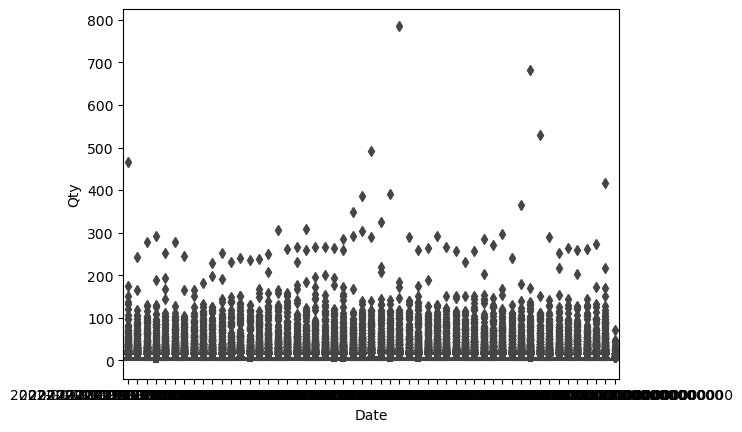

In [30]:
sns.boxplot(data=week_grp_lbl,x='Date',y='Qty')

In [14]:
from sklearn import svm
svm_clf = svm.SVC()

In [15]:
import numpy as np
x1,x2,x3,x4,x5,x6,x7,x8,y = week_grp_lbl['Date'],week_grp_lbl['Scan Code'],week_grp_lbl['Int Dept'],week_grp_lbl['POS Cost'],week_grp_lbl['POS Retail'], week_grp_lbl['Discounts'],week_grp_lbl['Temperature'],week_grp_lbl['Avg Gas Price'],week_grp_lbl['Qty']
x1,x2,x3,x4,x5,x6,x7,x8,y = np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(x6),np.array(x7),np.array(x8),np.array(y)
x1,x2,x3,x4,x5,x6,x7,x8,y = x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),x5.reshape(-1,1),x6.reshape(-1,1),x7.reshape(-1,1),x8.reshape(-1,1),y.reshape(len(week_grp_lbl,))
X = np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8),axis=1)
print(X)

[[1640995200000000000 '008437625001' 0 ... 0.0 6.0 2.9993000000000003]
 [1640995200000000000 '008660000026' 1 ... 0.0 6.0 2.9993000000000003]
 [1640995200000000000 '008660000156' 2 ... 0.0 6.0 2.9993000000000003]
 ...
 [1672444800000000000 '895216001060' 7 ... 0.3799999999999999 16.7 2.8592]
 [1672444800000000000 '9097202112052' 19 ... 0.0 16.7 2.8592]
 [1672444800000000000 '9555755800043' 2 ... 0.0 16.7 2.8592]]


In [16]:
X_train,X_test,y_train,y_test = X[:-23756],X[-23756:],y[:-23756],y[-23756:]
print(X_train,y_train)

[[1640995200000000000 '008437625001' 0 ... 0.0 6.0 2.9993000000000003]
 [1640995200000000000 '008660000026' 1 ... 0.0 6.0 2.9993000000000003]
 [1640995200000000000 '008660000156' 2 ... 0.0 6.0 2.9993000000000003]
 ...
 [1662768000000000000 '815970021203' 19 ... 0.0 25.25714285714286
  3.186557142857143]
 [1662768000000000000 '815970021586' 19 ... 0.0 25.25714285714286
  3.186557142857143]
 [1662768000000000000 '815970021616' 19 ... 0.0 25.25714285714286
  3.186557142857143]] [13.  1.  4. ...  1.  2.  1.]


In [17]:
svm_clf.fit(X_train,y_train)
print(svm_clf.score(X_test,y_test))

0.3234130324970534


In [19]:
pred = svm_clf.predict(X_test)

In [20]:
print(pred)

[1. 1. 1. ... 1. 1. 1.]


In [21]:
print(pred.shape)

(23756,)


In [22]:
pred

array([1., 1., 1., ..., 1., 1., 1.])

In [23]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 17.162545121366367


In [24]:
print(y_test)

[6. 2. 4. ... 4. 1. 5.]
